In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import sklearn.metrics


import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os


import torch

from types import SimpleNamespace

In [2]:
sns.set_context('talk')

# Load predictions

In [3]:
data_pt = torch.load("../data/Weinreb2020_fate/fate_test.pt")
x = data_pt['x']
y = data_pt['y']
t = data_pt['t']

In [4]:
len(y)

335

## Ensemble predictions over last 5 evaluated epochs

In [5]:
weights = ['none', 'kegg', 'd26']

results = []

for weight in weights:

    base_dir = "../experiments/weinreb-fate-train_batch-0.1/{}-softplus_2_400-1e-06/".format(weight)

    for seed in range(1, 5+1): 
        
        config_path = os.path.join(base_dir, 'seed_{}/config.pt'.format(seed))
        config = SimpleNamespace(**torch.load(config_path))

        fate_pt = torch.load("../" + os.path.join(config.out_dir, 'fate.pt'))
        scores = fate_pt['scores']
        mask = fate_pt['mask']
        names = fate_pt['names']

        ensembled_scores = np.stack(scores[-5:], axis = 0).mean(axis = 0)

        last_r = scipy.stats.pearsonr(scores[-1], y)[0]
        ensembled_r = scipy.stats.pearsonr(ensembled_scores, y)[0]

        last_auroc = sklearn.metrics.roc_auc_score(y > 0.5, scores[-1])
        ensembled_auroc = sklearn.metrics.roc_auc_score(y > 0.5, ensembled_scores)

        # number of cells for which at least a monocyte or neutrophil was sampled
        n = np.array(mask[-5:]).any(axis = 0).sum() / len(y)
        
        results.append((weight, seed, ensembled_r, ensembled_auroc, n))
    
results = pd.DataFrame(results, columns = ['weight', 'seed', 'r', 'auroc', 'n'])

In [6]:
results.groupby('weight')[['r', 'auroc', 'n']].describe().loc[:, pd.IndexSlice[:,['mean', 'std']]]

r               auroc                   n          
            mean       std      mean       std      mean       std
weight                                                            
d26     0.346567  0.029348  0.691953  0.011729  0.685970  0.010211
kegg    0.399128  0.025074  0.724548  0.007975  0.737313  0.011367
none    0.195667  0.019550  0.601240  0.006470  0.466866  0.038029

In [7]:
weights = ['all_none', 'all_kegg']

all_results = []

for weight in weights:

    base_dir = "../experiments/weinreb-fate-train_batch-0.1/{}-softplus_2_400-1e-06/".format(weight)

    for seed in range(1, 5+1): 
        
        config_path = os.path.join(base_dir, 'seed_{}/config.pt'.format(seed))
        config = SimpleNamespace(**torch.load(config_path))

        fate_pt = torch.load("../" + os.path.join(config.out_dir, 'fate.pt'))
        scores = fate_pt['scores']
        mask = fate_pt['mask']
        names = fate_pt['names']

        ensembled_scores = np.stack(scores[-5:], axis = 0).mean(axis = 0)

        last_r = scipy.stats.pearsonr(scores[-1], y)[0]
        ensembled_r = scipy.stats.pearsonr(ensembled_scores, y)[0]

        last_auroc = sklearn.metrics.roc_auc_score(y > 0.5, scores[-1])
        ensembled_auroc = sklearn.metrics.roc_auc_score(y > 0.5, ensembled_scores)

        # number of cells for which at least a monocyte or neutrophil was sampled
        n = np.array(mask[-5:]).any(axis = 0).sum() / len(y)
        
        all_results.append((weight, seed, ensembled_r, ensembled_auroc, n))
    
all_results = pd.DataFrame(all_results, columns = ['weight', 'seed', 'r', 'auroc', 'n'])

In [8]:
all_results.groupby('weight')[['r', 'auroc', 'n']].describe().loc[:, pd.IndexSlice[:,['mean', 'std']]]

r               auroc                   n          
              mean       std      mean       std      mean       std
weight                                                              
all_kegg  0.391469  0.034522  0.723462  0.013084  0.807761  0.028756
all_none  0.080973  0.022326  0.537330  0.012736  0.553433  0.036474

In [9]:
weights = ['heldout_none', 'heldout_kegg']

heldout_results = []

for weight in weights:

    base_dir = "../experiments/weinreb-fate-train_batch-0.1/{}-softplus_2_400-1e-06/".format(weight)

    for seed in range(1, 5+1): 
        
        config_path = os.path.join(base_dir, 'seed_{}/config.pt'.format(seed))
        config = SimpleNamespace(**torch.load(config_path))

        fate_pt = torch.load("../" + os.path.join(config.out_dir, 'fate.pt'))
        scores = fate_pt['scores']
        mask = fate_pt['mask']
        names = fate_pt['names']

        ensembled_scores = np.stack(scores[-5:], axis = 0).mean(axis = 0)

        last_r = scipy.stats.pearsonr(scores[-1], y)[0]
        ensembled_r = scipy.stats.pearsonr(ensembled_scores, y)[0]

        last_auroc = sklearn.metrics.roc_auc_score(y > 0.5, scores[-1])
        ensembled_auroc = sklearn.metrics.roc_auc_score(y > 0.5, ensembled_scores)

        # number of cells for which at least a monocyte or neutrophil was sampled
        n = np.array(mask[-5:]).any(axis = 0).sum() / len(y)
        
        heldout_results.append((weight, seed, ensembled_r, ensembled_auroc, n))
    
heldout_results = pd.DataFrame(heldout_results, columns = ['weight', 'seed', 'r', 'auroc', 'n'])
heldout_results

,weight,seed,r,auroc,n
0,heldout_none,1,-0.020753,0.500143,0.731343
1,heldout_none,2,0.131841,0.564158,0.695522
2,heldout_none,3,0.060317,0.534104,0.808955
3,heldout_none,4,-0.005599,0.492724,0.740299
4,heldout_none,5,0.009792,0.483728,0.689552
5,heldout_kegg,1,0.405971,0.717849,0.859701
6,heldout_kegg,2,0.411239,0.744534,0.829851
7,heldout_kegg,3,0.378025,0.714014,0.823881
8,heldout_kegg,4,0.431029,0.740663,0.835821
9,heldout_kegg,5,0.408559,0.720125,0.811940


In [10]:
heldout_results.groupby('weight')[['r', 'auroc', 'n']].describe().loc[:, pd.IndexSlice[:,['mean', 'std']]]

r               auroc                   n          
                  mean       std      mean       std      mean       std
weight                                                                  
heldout_kegg  0.406965  0.018963  0.727437  0.014078  0.832239  0.017710
heldout_none  0.035120  0.062071  0.514971  0.033453  0.733134  0.047743

# Other methods

In [11]:
base_dir = "../ext/klein_Figure5_data_and_code/"

timepoints = np.load(base_dir + 'timepoints.npy')
neu_mo_mask = np.load(base_dir + 'neutrophil_monocyte_trajectory_mask.npy')
clonal_fate_matrix = np.load(base_dir + 'clonal_fate_matrix.npy')

PBA_predictions = np.load(base_dir + 'PBA_predictions.npy')
FateID_predictions = np.load(base_dir + 'FateID_predictions.npy')
WOT_predictions = np.load(base_dir + 'WOT_predictions.npy')

early_cells = np.load(base_dir + 'early_cells.npy')
heldout_mask = np.load(base_dir + 'heldout_mask.npy')

smoothed_groundtruth = np.load(base_dir + 'smoothed_groundtruth_from_heldout.npy')

has_fate_mask = np.all([clonal_fate_matrix[:,5:7].sum(1) > 0, neu_mo_mask[timepoints==2]],axis=0)
neu_vs_mo_percent = clonal_fate_matrix[has_fate_mask,5] / clonal_fate_matrix[has_fate_mask,5:7].sum(1)

heldout_mask_for_early_cells = (~heldout_mask)[early_cells[neu_mo_mask[timepoints==2]]]

predictions = []
predictions.append(smoothed_groundtruth[np.all([early_cells[neu_mo_mask[timepoints==2]], ~heldout_mask],axis=0)])

predictions.append(PBA_predictions[early_cells[neu_mo_mask[timepoints==2]]][heldout_mask_for_early_cells])
predictions.append(WOT_predictions[early_cells[neu_mo_mask[timepoints==2]]][heldout_mask_for_early_cells])
predictions.append(FateID_predictions[early_cells[neu_mo_mask[timepoints==2]]][heldout_mask_for_early_cells])

clonal_data_no_heldout = neu_vs_mo_percent[np.all([early_cells[neu_mo_mask[timepoints==2]], ~heldout_mask],axis=0)[has_fate_mask[neu_mo_mask[timepoints==2]]]]

has_fate_mask_for_early_heldout = has_fate_mask[np.all([neu_mo_mask[timepoints==2],early_cells],axis=0)][heldout_mask_for_early_cells]
predictions_filtered = [pred[has_fate_mask_for_early_heldout] for pred in predictions]

In [12]:
other_r = [scipy.stats.pearsonr(p, clonal_data_no_heldout)[0] for p in predictions_filtered]
other_r

[0.4854376418485752,
 0.16236666411029577,
 0.14998934146818402,
 0.225213954456998]

In [13]:
other_auroc = [sklearn.metrics.roc_auc_score(clonal_data_no_heldout > 0.5, p) for p in predictions_filtered]
other_auroc

[0.7713082437275985, 0.5389247311827957, 0.599068100358423, 0.6020430107526882]

# Plot

## r

In [14]:
sns.set_style("ticks")

In [15]:
heldout_results

,weight,seed,r,auroc,n
0,heldout_none,1,-0.020753,0.500143,0.731343
1,heldout_none,2,0.131841,0.564158,0.695522
2,heldout_none,3,0.060317,0.534104,0.808955
3,heldout_none,4,-0.005599,0.492724,0.740299
4,heldout_none,5,0.009792,0.483728,0.689552
5,heldout_kegg,1,0.405971,0.717849,0.859701
6,heldout_kegg,2,0.411239,0.744534,0.829851
7,heldout_kegg,3,0.378025,0.714014,0.823881
8,heldout_kegg,4,0.431029,0.740663,0.835821
9,heldout_kegg,5,0.408559,0.720125,0.811940


Text(0, 0.5, '')

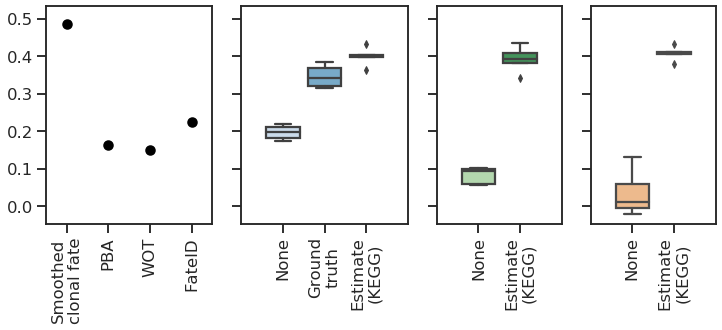

In [19]:
fig, ax = plt.subplots(1, 4, sharey = True, figsize = (12, 4), 
    gridspec_kw = {'width_ratios' :[4, 4, 3, 3]})

ax[0].scatter([0, 1, 2, 3], other_r, color = 'k')
ax[0].set_xlim(-0.5, 3.5)
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels(['Smoothed\nclonal fate', 'PBA', 'WOT', 'FateID'], rotation = 90)

sns.boxplot(data = results, x = 'weight', y = 'r', ax = ax[1], width = .8, palette = 'Blues', 
    order = ['none', 'd26', 'kegg'])
ax[1].set_xlim(-1, 3)
ax[1].set_xticklabels(['None', 'Ground\ntruth', 'Estimate\n(KEGG)'], rotation = 90)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

sns.boxplot(data = all_results, x = 'weight', y = 'r', ax = ax[2], width = .8, palette = 'Greens', 
    order = ['all_none', 'all_kegg'])
ax[2].set_xlim(-1, 2)
ax[2].set_xticklabels(['None', 'Estimate\n(KEGG)'], rotation = 90)
ax[2].set_xlabel('')
ax[2].set_ylabel('')

sns.boxplot(data = heldout_results, x = 'weight', y = 'r', ax = ax[3], width = .8, palette = 'Oranges', 
    order = ['heldout_none', 'heldout_kegg'])
ax[3].set_xlim(-1, 2)
ax[3].set_xticklabels(['None', 'Estimate\n(KEGG)'], rotation = 90)
ax[3].set_xlabel('')
ax[3].set_ylabel('')

In [28]:
heldout_results.loc[heldout_results['weight'] == 'heldout_kegg', 'r']

5    0.405971
6    0.411239
7    0.378025
8    0.431029
9    0.408559
Name: r, dtype: float64

In [27]:
heldout_results.loc[heldout_results['weight'] == 'heldout_kegg', 'r'] - other_r[-1]

5    0.180757
6    0.186025
7    0.152811
8    0.205815
9    0.183345
Name: r, dtype: float64

Text(0, 0.5, '')

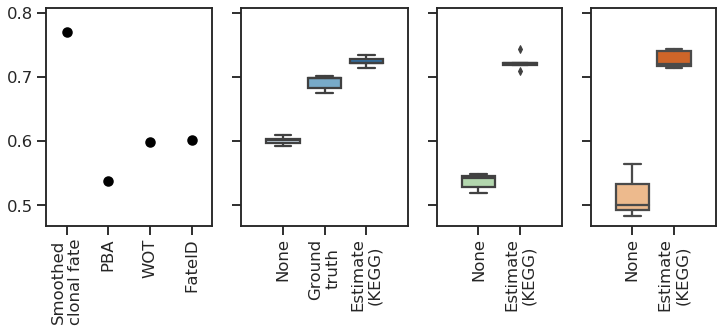

In [17]:
fig, ax = plt.subplots(1, 4, sharey = True, figsize = (12, 4), 
    gridspec_kw = {'width_ratios' :[4, 4, 3, 3]})

ax[0].scatter([0, 1, 2, 3], other_auroc, color = 'k')
ax[0].set_xlim(-0.5, 3.5)
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels(['Smoothed\nclonal fate', 'PBA', 'WOT', 'FateID'], rotation = 90)

sns.boxplot(data = results, x = 'weight', y = 'auroc', ax = ax[1], width = .8, palette = 'Blues', 
    order = ['none', 'd26', 'kegg'])
ax[1].set_xlim(-1, 3)
ax[1].set_xticklabels(['None', 'Ground\ntruth', 'Estimate\n(KEGG)'], rotation = 90)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

sns.boxplot(data = all_results, x = 'weight', y = 'auroc', ax = ax[2], width = .8, palette = 'Greens', 
    order = ['all_none', 'all_kegg'])
ax[2].set_xlim(-1, 2)
ax[2].set_xticklabels(['None', 'Estimate\n(KEGG)'], rotation = 90)
ax[2].set_xlabel('')
ax[2].set_ylabel('')

sns.boxplot(data = heldout_results, x = 'weight', y = 'auroc', ax = ax[3], width = .8, palette = 'Oranges', 
    order = ['heldout_none', 'heldout_kegg'])
ax[3].set_xlim(-1, 2)
ax[3].set_xticklabels(['None', 'Estimate\n(KEGG)'], rotation = 90)
ax[3].set_xlabel('')
ax[3].set_ylabel('')

Add number of cells in which predictions are made

Text(0, 0.5, '')

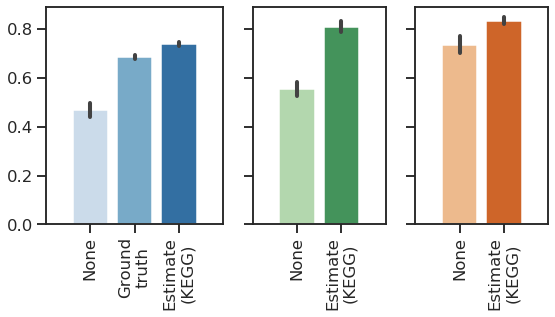

In [18]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (9, 4), 
    gridspec_kw = {'width_ratios' :[4, 3, 3]})

sns.barplot(data = results, x = 'weight', y = 'n', ax = ax[0], palette = 'Blues', 
    order = ['none', 'd26', 'kegg'])
ax[0].set_xlim(-1, 3)
ax[0].set_xticklabels(['None', 'Ground\ntruth', 'Estimate\n(KEGG)'], rotation = 90)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data = all_results, x = 'weight', y = 'n', ax = ax[1], palette = 'Greens', 
    order = ['all_none', 'all_kegg'])
ax[1].set_xlim(-1, 2)
ax[1].set_xticklabels(['None', 'Estimate\n(KEGG)'], rotation = 90)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

sns.barplot(data = heldout_results, x = 'weight', y = 'n', ax = ax[2], palette = 'Oranges', 
    order = ['heldout_none', 'heldout_kegg'])
ax[2].set_xlim(-1, 2)
ax[2].set_xticklabels(['None', 'Estimate\n(KEGG)'], rotation = 90)
ax[2].set_xlabel('')
ax[2].set_ylabel('')